In [13]:
CHOSEN_ID = 306

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import math

plt.rcParams.update({'font.size': 14})
plt.rcParams['figure.figsize'] = (10, 6)

dataset_path = "./data/raw_can_data/1508_031226_parado_giro_parado.txt"


columns = ['id', 'timestamp', 'byte0', 'byte1', 'byte2', 'byte3', 'byte4', 'byte5', 'byte6', 'byte7']
df = pd.read_csv(dataset_path, header=None, names=columns)
print(f"{df.shape[0]} observações em {(df.tail(1)['timestamp'].to_numpy()[0] - df.head(1)['timestamp'].to_numpy()[0]) /1000} segundos")

id_data = df[df['id'] == CHOSEN_ID]
print(f"ID {CHOSEN_ID}: {df.shape[0]} observações")

id_data.tail(10)

3364 observações em 16.269 segundos
ID 306: 3364 observações


,id,timestamp,byte0,byte1,byte2,byte3,byte4,byte5,byte6,byte7
2473,306,17822,172,129,60,127,23,3,58,2.0
2567,306,18279,173,129,61,127,23,3,58,2.0
2662,306,18737,173,129,62,127,23,3,58,2.0
2756,306,19193,175,129,106,127,23,3,58,2.0
2851,306,19650,174,129,63,127,23,3,58,2.0
2945,306,20107,175,129,107,127,23,3,58,2.0
3041,306,20562,175,129,64,127,23,3,58,2.0
3138,306,21020,176,129,108,127,23,3,58,2.0
3234,306,21476,177,129,65,127,23,3,58,2.0
3331,306,21934,177,129,65,127,23,3,58,2.0


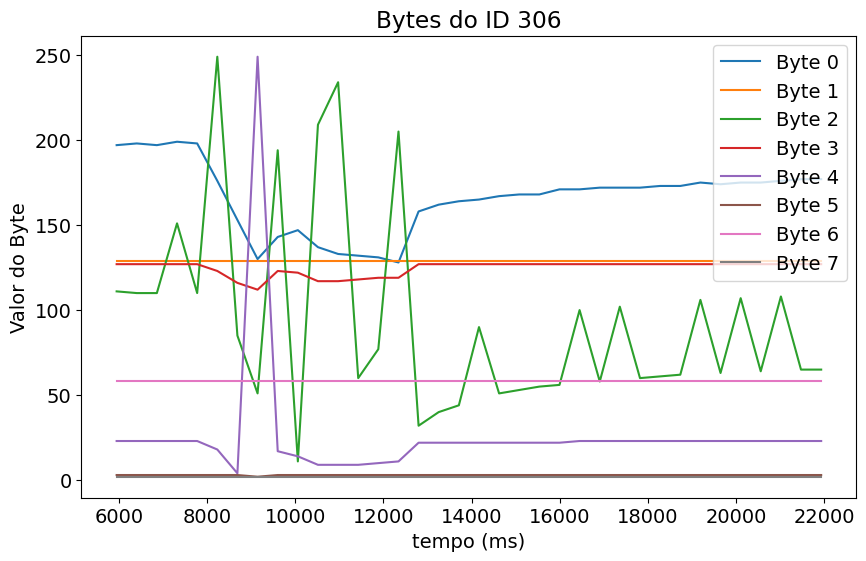

In [15]:
# analisa os bytes do ID 95

for i in range(2, id_data.shape[1]):
    plt.plot(id_data['timestamp'], id_data.iloc[:,i], label=f"Byte {i - 2}")

plt.xlabel('tempo (ms)')
plt.ylabel('Valor do Byte')
plt.title(f'Bytes do ID {CHOSEN_ID}')

plt.legend()
plt.show()

C:\Users\rapha\AppData\Local\Temp\ipykernel_9664\2562567933.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


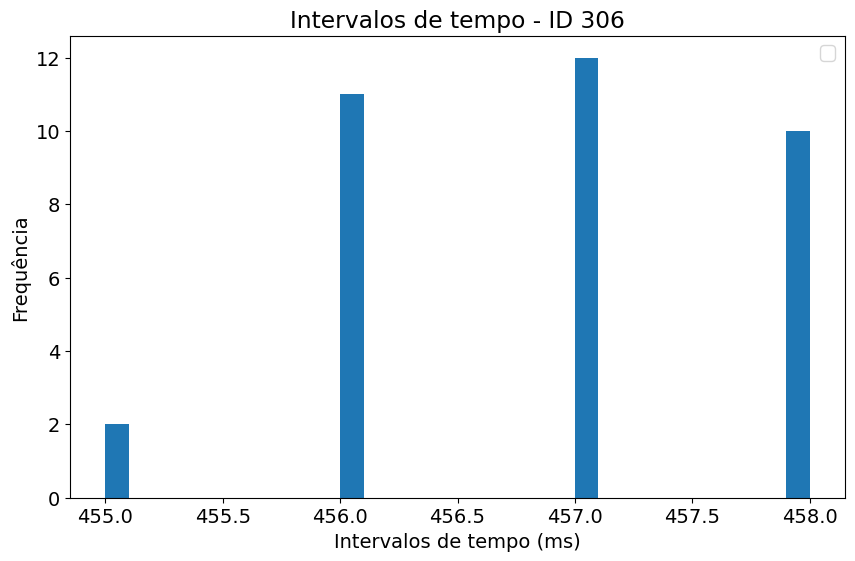

In [16]:
        
time_intervals = []

for i in range(1, id_data['timestamp'].shape[0]):
    time_intervals.append(id_data['timestamp'].iloc[i] - id_data['timestamp'].iloc[i-1])

plt.hist(time_intervals, bins=30)

plt.xlabel('Intervalos de tempo (ms)')
plt.ylabel('Frequência')
plt.title(f'Intervalos de tempo - ID {CHOSEN_ID}')

# Add a legend
plt.legend()

# Display the plot
plt.show()